# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tufanbeyli
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | howard springs
Processing Record 4 of Set 1 | fisterra
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | nefta
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | kholmsk
Processing Record 16 of Set 1 | prineville
Processing Record 17 of Set 1 | hotan
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | lai chau
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | kapuskasing
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tufanbeyli,38.2633,36.2206,275.49,35,0,0.85,TR,1709073115
1,blackmans bay,-43.0167,147.3167,292.33,66,100,1.72,AU,1709073116
2,howard springs,-12.4970,131.0470,301.41,95,62,2.79,AU,1709073117
3,fisterra,42.9049,-9.2629,283.01,76,100,3.98,ES,1709073118
4,port-aux-francais,-49.3500,70.2167,281.36,96,98,11.17,TF,1709073119


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tufanbeyli,38.2633,36.2206,275.49,35,0,0.85,TR,1709073115
1,blackmans bay,-43.0167,147.3167,292.33,66,100,1.72,AU,1709073116
2,howard springs,-12.4970,131.0470,301.41,95,62,2.79,AU,1709073117
3,fisterra,42.9049,-9.2629,283.01,76,100,3.98,ES,1709073118
4,port-aux-francais,-49.3500,70.2167,281.36,96,98,11.17,TF,1709073119


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

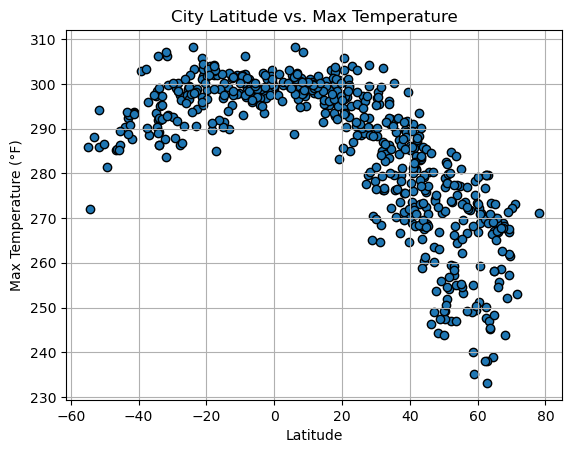

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

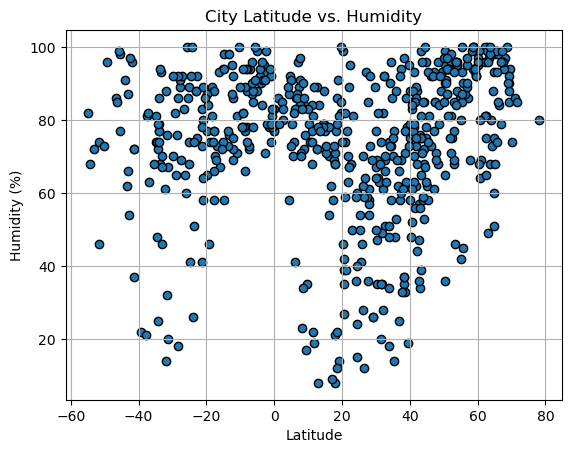

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

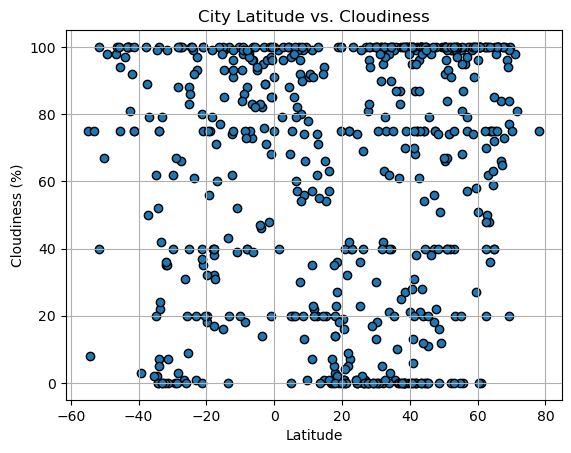

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

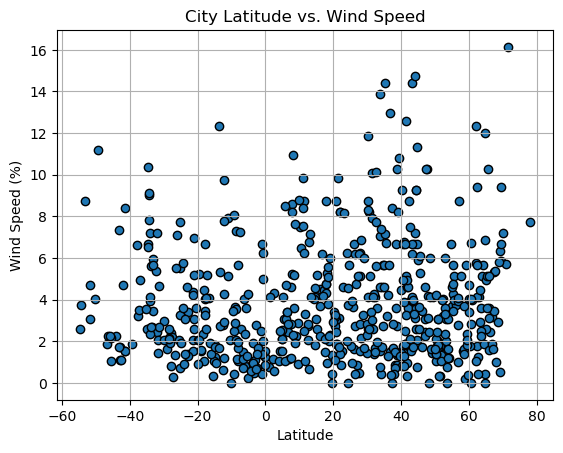

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_value, y_value, y_label, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_model = x_value * slope + intercept
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_model, "r-")
    plt.ylabel(y_label)
    plt.xlabel('Latitude')
    plt.annotate(f'y = {str(round(slope,2))}x + {str(round(intercept,2))}', (x, y), fontsize=13, color="red")
    print(f"The r-value is: {rvalue}")
    return plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tufanbeyli,38.2633,36.2206,275.49,35,0,0.85,TR,1709073115
3,fisterra,42.9049,-9.2629,283.01,76,100,3.98,ES,1709073118
5,hasaki,35.7333,140.8333,276.37,48,1,6.70,JP,1709073119
8,keflavik,64.0049,-22.5624,273.39,80,75,5.14,IS,1709073122
9,talnakh,69.4865,88.3972,261.60,94,100,5.87,RU,1709073124


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,292.33,66,100,1.72,AU,1709073116
2,howard springs,-12.4970,131.0470,301.41,95,62,2.79,AU,1709073117
4,port-aux-francais,-49.3500,70.2167,281.36,96,98,11.17,TF,1709073119
6,afaahiti,-17.7500,-149.2833,302.07,77,38,3.45,PF,1709073120
7,puerto natales,-51.7236,-72.4875,285.90,74,100,4.72,CL,1709073121


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8127556061041175


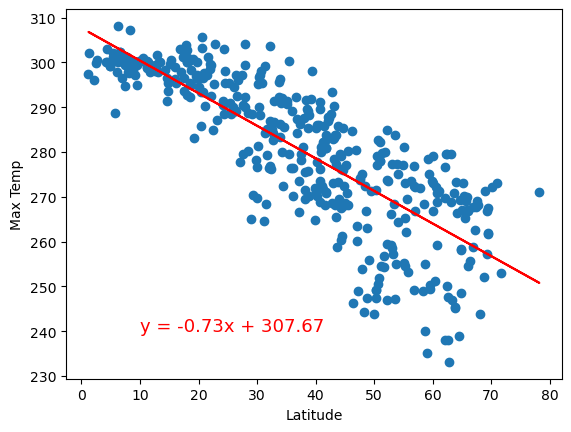

In [27]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", 10, 240)

The r-value is: 0.5586651779606213


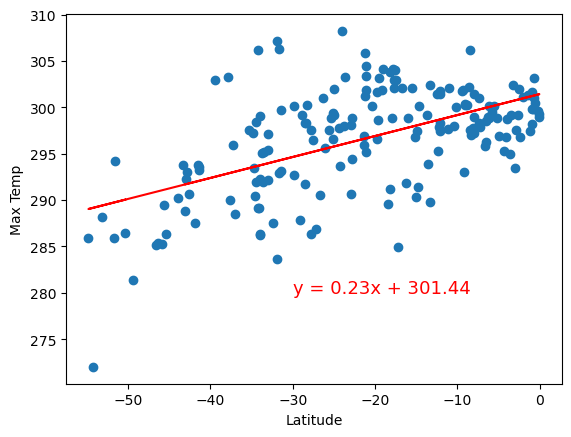

In [31]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", -30, 280)

**Discussion about the linear relationship:** The northern hemisphere has a strong negative correlation between Latitude and Max Temp. Whereas in the Southern hempishere, the Latitude and Max Temp have a weak positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3251954223922637


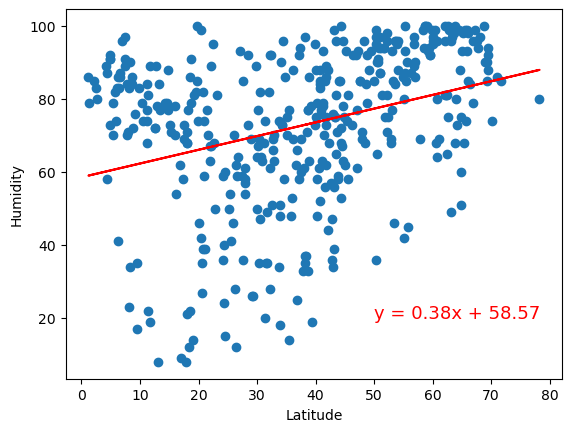

In [33]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", 50, 20)

The r-value is: 0.298697504291903


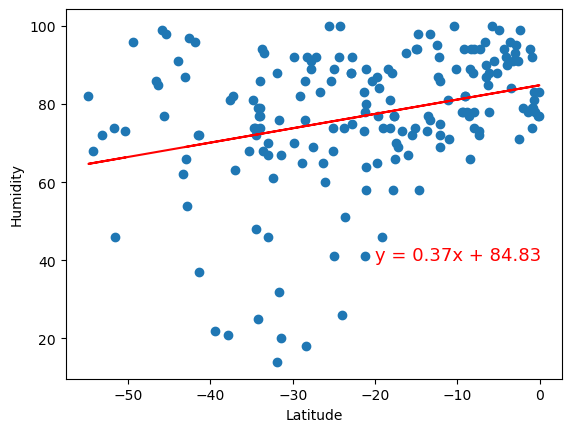

In [35]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", -20, 40)

**Discussion about the linear relationship:** The northern hemisphere has a weak positive correlation between Latitude and Humidity. Whereas in the Southern hempishere, the Latitude and Humidity have a very weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.24379530123314386


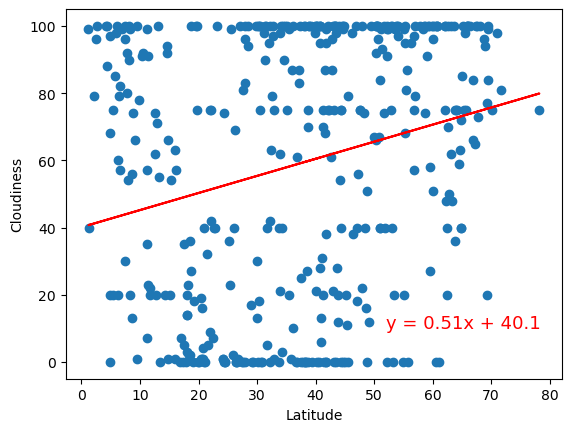

In [38]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", 52, 10)

The r-value is: 0.16228161214311737


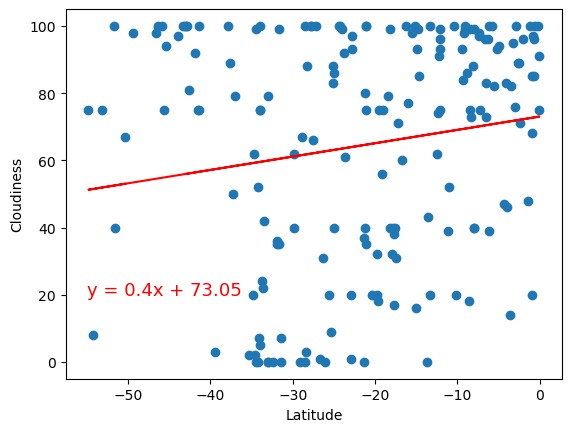

In [42]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", -55, 20)

**Discussion about the linear relationship:** The northern hemisphere has a very weak (almost no) positive correlation between Latitude and Cloudiness. Whereas in the Southern hempishere, the Latitude and Cloudiness have a very weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013906188932726318


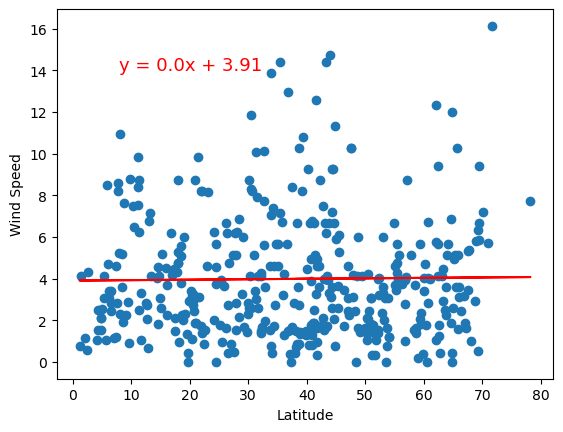

In [45]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", 8, 14)

The r-value is: -0.24511782791615572


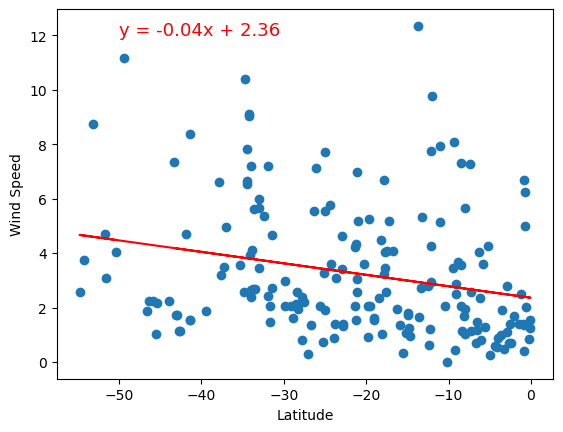

In [47]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", -50, 12)

**Discussion about the linear relationship:** The northern hemisphere has a almost no correlation between Latitude and Wind Speed. Whereas in the Southern hempishere, the Latitude and Wind Speed have a very weak negative correlation.